<a href="https://colab.research.google.com/github/eryyyj/Machine_Learning/blob/main/Midterms/HOA5.2Pisalbon_Hands_on_Activity5_2__Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 3.2 Random Forest

Objective(s):

This activity aims to perform classification  using Random Forest

Intended Learning Outcomes (ILOs):
* Demonstrate how to build the model using Random Forest.
* Demonstrate how to evaluate the performance of the model.


Resources:
* Jupyter Notebook
* loan_data

Procedure:

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Import the libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the data and check the content of the dataframe using Pandas

In [ ]:
loans= pd.read_csv('/content/drive/MyDrive/DATASETS/loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Examine the data types.

In [ ]:
loans.dtypes

,0
credit.policy,int64
purpose,object
int.rate,float64
installment,float64
log.annual.inc,float64
dti,float64
fico,int64
days.with.cr.line,float64
revol.bal,int64
revol.util,float64


Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

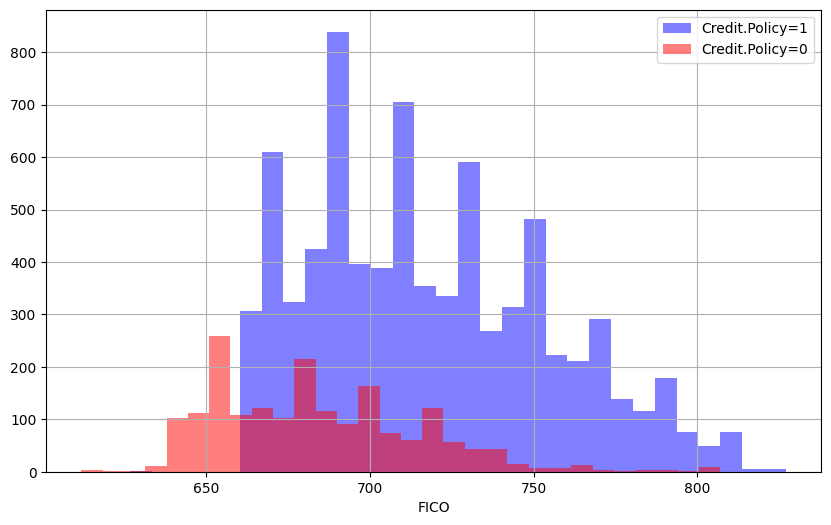

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

My interpretation on the graph is that Credit.Policy = 0 resides on the lower part of the graph while 1 resides higher on top of the graph (the population has high fico scores) and there is overlapping of data on middle part of the graph, those who have credit policy (1) and and has a fico score between 650 and 700 shows a high population of exceeds the 800 mark

Create a similar figure, except this time select by the not.fully.paid column.

Text(0.5, 0, 'FICO')

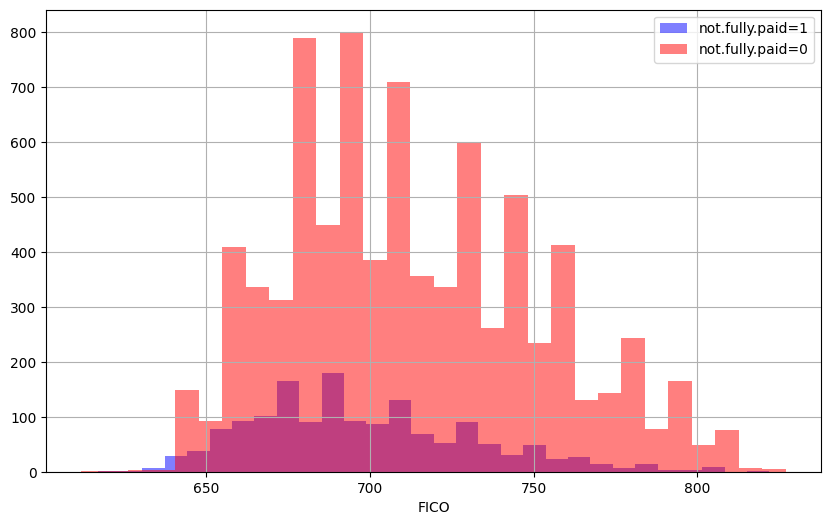

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Interpret the result of the graph

My interpretation on the graph is there is a low numbero of not fully paid people in the graph with the high fico scores and fico scores between 650 and 700 has a high of population of people who are not fully paid, majority of the population doesn't have a high fico scores because it is showing a short bar on the graph, and those who are fully paid has a low population of low fico scores

Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

<Axes: xlabel='purpose', ylabel='count'>

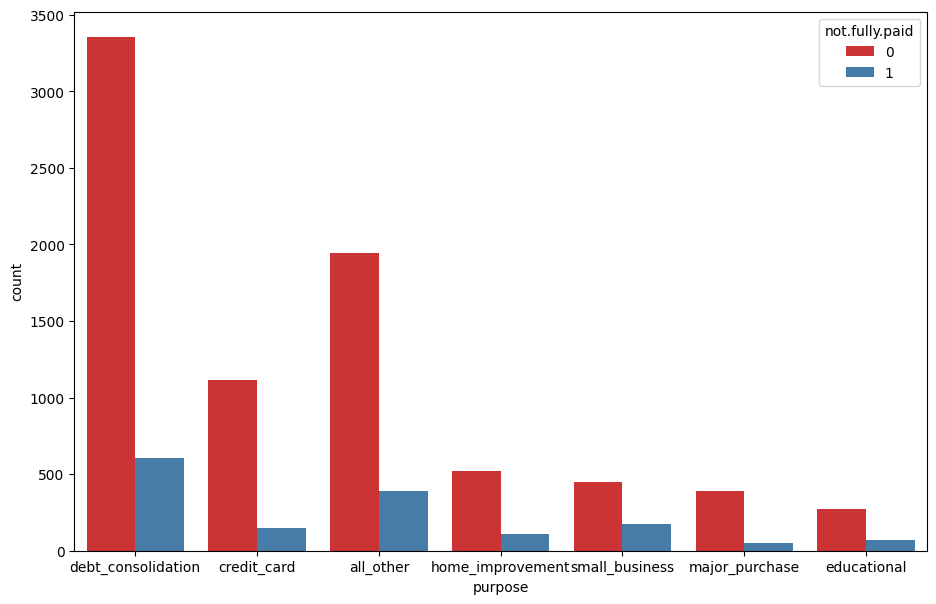

In [ ]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

Interpret the result of the graph.

majority of the population on the dataset chooses debt_consolidation as purpose for people who arefully paid and fully paid datapoints rarely uses the loan for educational purpose, while the datapoints who are not fully paid main purpose is also on the debt_consolidation while the least purpose of the not fully paid datapoints are on major_purchase

Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy.

<Figure size 1100x700 with 0 Axes>

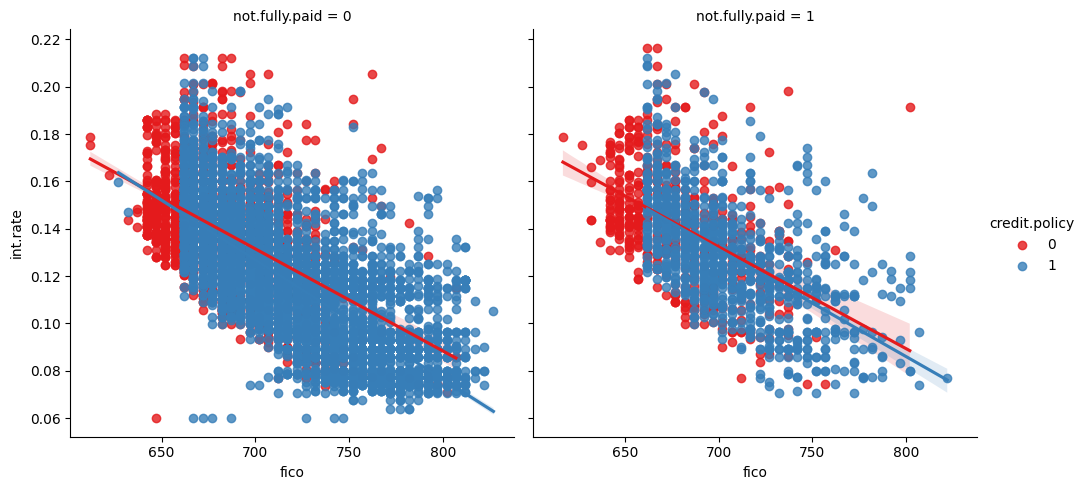

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

Interpret the result of the graph

low fico scores on both fully paid and not fully paid has the majority of credit policy of zero while high fico scores on both full paid and not fully paid populates the credit policy 1, and for the datapoints who have a credit policy of 0, datapoints who dont have credit policy often have a lower fico scores compares to those who have, and people who have a credit policy have high fico scores


The **purpose** column contains categorical value. Therefore, we need to transform the data using dummy variables.
otice that the **purpose** column as categorical



In [ ]:
cat_feats = ['purpose']

In [ ]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Split the data into a training set and a testing set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Create an instance of the RandomForestClassifier class and fit it to our training data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

What is n_estimators?

the n_estimators in the dataset are like the one we used on SVM it is a hyperparameter that decides the number of decision trees in our model it makes an n number of trees and makes an n number of decision based on the trees and then combines of their decision to make a final classification on out model

Predict the class of not.fully.paid for the X_test data.

In [ ]:
predictions = rfc.predict(X_test)

Create a classification report from the results

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_auc_score

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



Show the Confusion Matrix for the predictions.

In [ ]:
print(confusion_matrix(y_test,predictions))

[[2425    6]
 [ 435    8]]


In [ ]:
#evaluate the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.8465553235908142


In [ ]:
print(roc_auc_score(y_test, predictions))

0.5077952853148711


Interpret the result of the classification error, confusion matrix , accuracy score and roc_auc_score

my interpretations of the performance of the model includes

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Build the model using Ranfom Forest
* Evaluate the model using classification report, accuracy , confusion matrix and roc_auc_score
* Change the n_estimators from 100 to 1000, increment by 100.
* Create a graph to compare the accuracy based from n_estimators

In [ ]:
# importing my data set
gcdf = pd.read_csv('/content/drive/MyDrive/DATASETS/GenderClassification_UsingHWShoesize.csv')
gcdf.head()

,Hight,Weight,Shoe size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M


In [ ]:
# Determine the number of datapoints, columns and data types
gcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hight      109 non-null    int64  
 1   Weight     109 non-null    float64
 2   Shoe size  109 non-null    int64  
 3   Gender     109 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


In [ ]:
print("number of records: ", len(gcdf))
print("number of columns: ", len(gcdf.columns))

number of records:  109
number of columns:  4


In [ ]:
# Remove unneccesary columns
# Do data cleaning such as removing empty values(NaN), replacing missing data .

gcdf.isnull().sum()

,0
Hight,0
Weight,0
Shoe size,0
Gender,0


In [ ]:
# renaming the type on the column name

gcdf.rename(columns={'Hight':'Height','Shoe size':'Shoe_size'}, inplace=True)

In [ ]:
# checking if the renaming is successful

gcdf.head()

,Height,Weight,Shoe_size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M


In [ ]:
#replacing Gender column to binary
gcdf['Gender'] = gcdf['Gender'].replace({'M': 1, 'F': 0})
gcdf.head()

<ipython-input-29-8bd4a6771023>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gcdf['Gender'] = gcdf['Gender'].replace({'M': 1, 'F': 0})


,Height,Weight,Shoe_size,Gender
0,180,79.0,42,1
1,165,65.0,41,1
2,178,72.0,42,1
3,160,53.0,43,1
4,182,78.0,36,1


In [ ]:
# Performing descriptive statistics such as mean, median and mode
gcdf_meanMed = gcdf.describe().loc[['mean','50%']]
gcdf_meanMed.rename(index={'50%':'median'},inplace = True)
gcdf_meanMed.head()

,Height,Weight,Shoe_size,Gender
mean,173.40367,95.887156,40.743119,0.550459
median,174.00000,95.000000,41.000000,1.000000


In [ ]:
mode = gcdf.mode().loc[0]
mode = pd.DataFrame(mode).T
mode.rename(index={0:'mode'},inplace = True)
mode.head()

,Height,Weight,Shoe_size,Gender
mode,172.0,110.0,42.0,1.0


In [ ]:
gcdf_statdesc = pd.concat([gcdf_meanMed,mode])
gcdf_statdesc.fillna('-',inplace=True)
gcdf_statdesc

,Height,Weight,Shoe_size,Gender
mean,173.40367,95.887156,40.743119,0.550459
median,174.00000,95.000000,41.000000,1.000000
mode,172.00000,110.000000,42.000000,1.000000


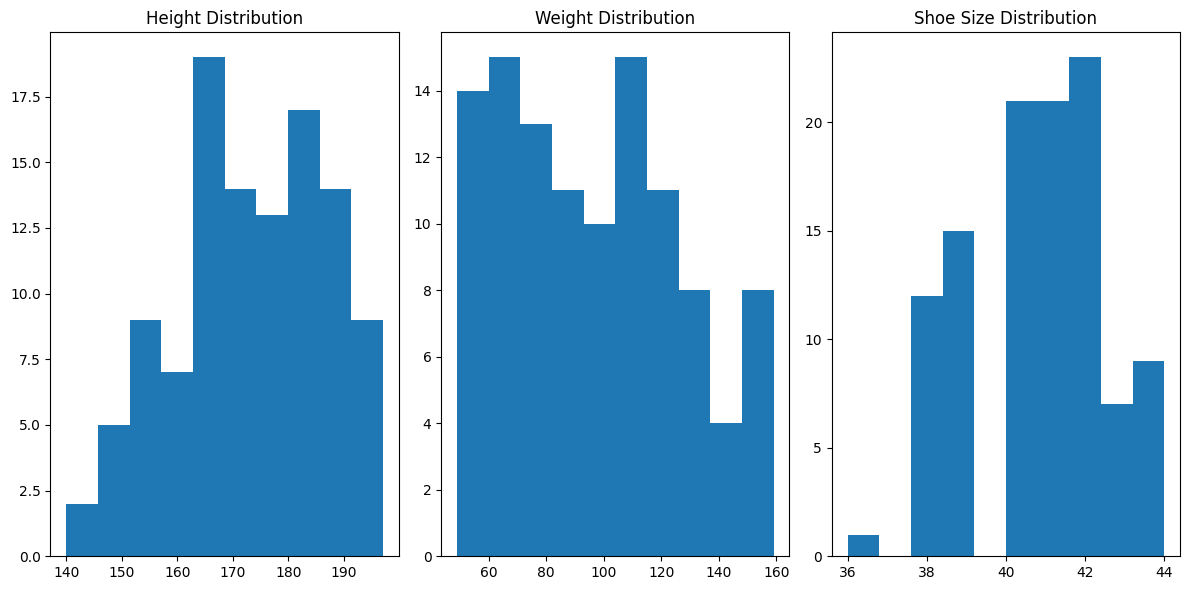

Text(0.5, 1.0, 'Correlation Matrix')

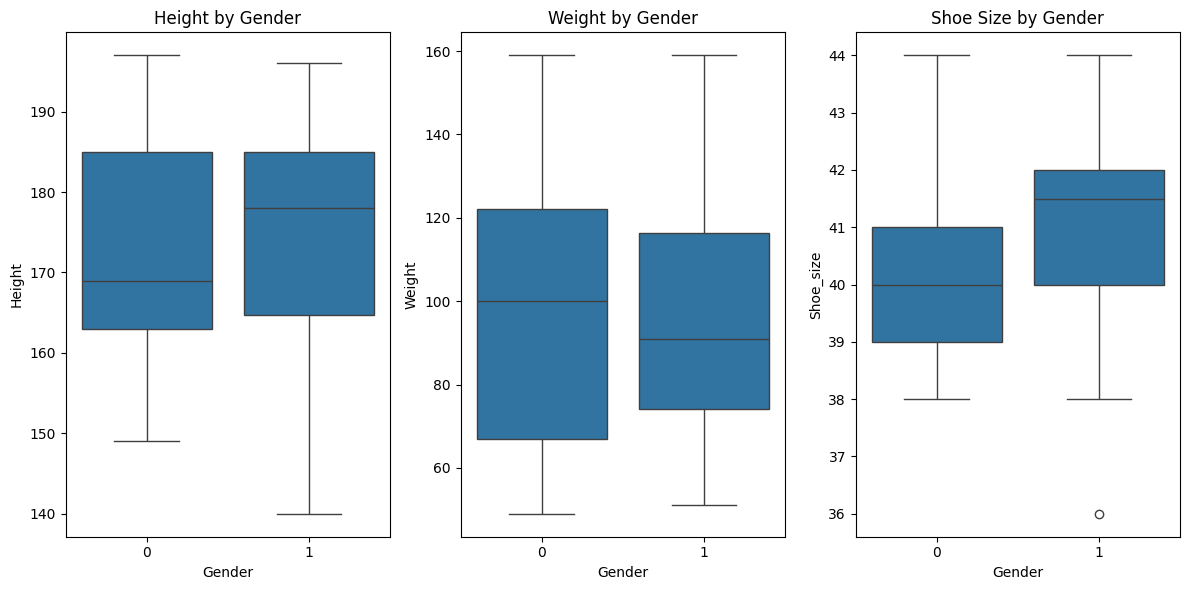

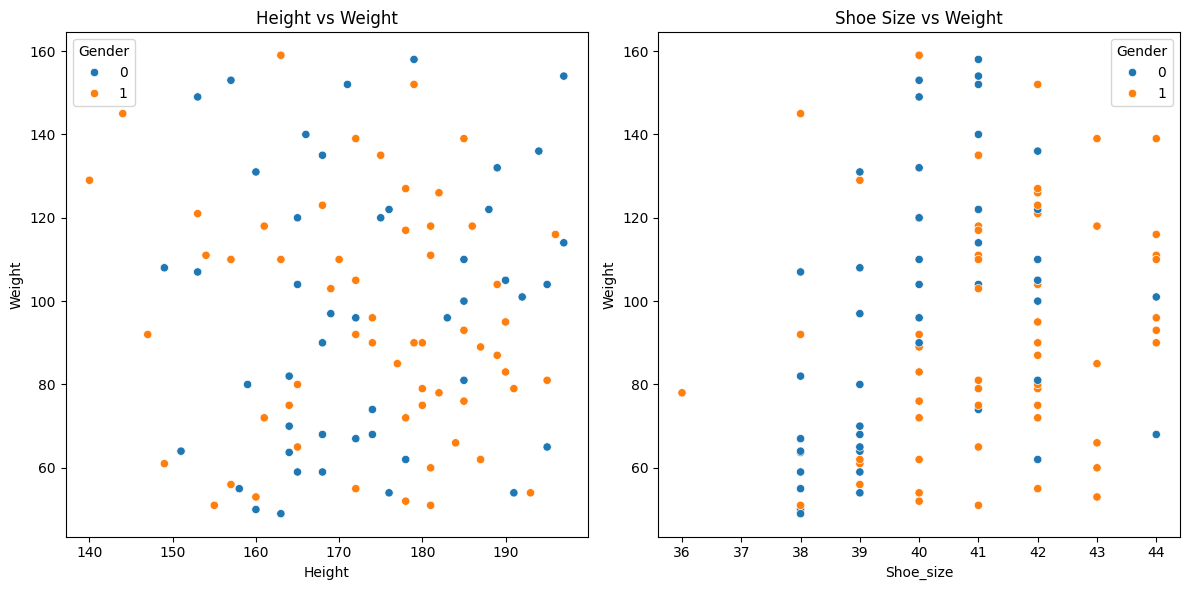

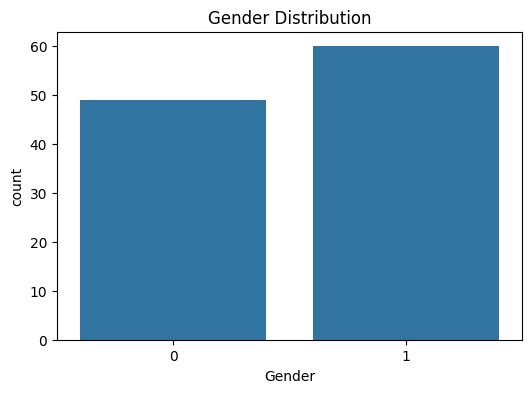

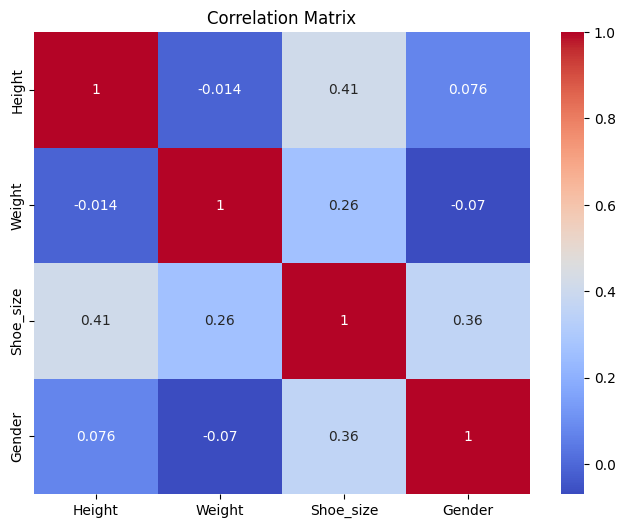

In [ ]:
# Performing data visualization on gcdf dataframe
# Histogram for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.hist(gcdf['Height'], bins=10)
plt.title('Height Distribution')

plt.subplot(1, 3, 2)
plt.hist(gcdf['Weight'], bins=10)
plt.title('Weight Distribution')

plt.subplot(1, 3, 3)
plt.hist(gcdf['Shoe_size'], bins=10)
plt.title('Shoe Size Distribution')
plt.tight_layout()
plt.show()

# Boxplot for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Height', data=gcdf)
plt.title('Height by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Gender', y='Weight', data=gcdf)
plt.title('Weight by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='Shoe_size', data=gcdf)
plt.title('Shoe Size by Gender')
plt.tight_layout()


# Scatter plot for numerical features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=gcdf)
plt.title('Height vs Weight')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Shoe_size', y='Weight', hue='Gender', data=gcdf)
plt.title('Shoe Size vs Weight')
plt.tight_layout()

# Count plot for categorical feature
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=gcdf)
plt.title('Gender Distribution')

# Correlation matrix heatmap
correlation_matrix = gcdf.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [ ]:
#Building the model using Random Forest

X_gc = gcdf.drop('Gender',axis=1)
y_gc = gcdf['Gender']

In [ ]:
#splitting the dataset for training and validating
X_train_gc, X_test_gc, y_train_gc, y_test_gc = train_test_split(X, y, test_size=0.30)

In [ ]:
#making the model and training the model
rfgc = RandomForestClassifier(n_estimators=400)
rfgc.fit(X_train_gc,y_train_gc)

RandomForestClassifier(n_estimators=400)

In [ ]:
len(y_train_gc[y_train_gc ==1])

1053

In [ ]:
len(y_train_gc[y_train_gc==0])

5651

In [ ]:
pred_gc = rfgc.predict(X_test_gc)

In [ ]:
print('classification report')
print(classification_report(y_test_gc,pred_gc))

classification report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2394
           1       0.53      0.02      0.03       480

    accuracy                           0.83      2874
   macro avg       0.68      0.51      0.47      2874
weighted avg       0.78      0.83      0.76      2874



In [ ]:
print('confusion matrix')
print(confusion_matrix(y_test_gc,pred_gc))

confusion matrix
[[2387    7]
 [ 472    8]]


In [ ]:
print('accuracy score')
print(accuracy_score(y_test_gc, pred_gc))

accuracy score
0.8333333333333334


In [ ]:
print('roc_auc_score')
print(roc_auc_score(y_test_gc, pred_gc))

roc_auc_score
0.5068713450292397


Text(0.5, 1.0, 'Accuracy vs. n_estimators')

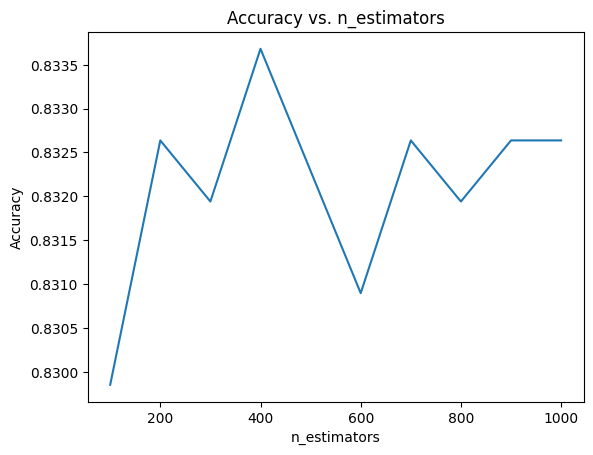

In [ ]:
# Change the n_estimators from 100 to 1000, increment by 100.
# Create a graph to compare the accuracy based from n_estimators
accuracy_scores = []
n_estimators_values = []
for n_estimators in range(100, 1001, 100):
  rfc = RandomForestClassifier(n_estimators=n_estimators)
  rfc.fit(X_train_gc, y_train_gc)
  preds = rfc.predict(X_test_gc)
  accuracy = accuracy_score(y_test_gc, preds)
  accuracy_scores.append(accuracy)
  n_estimators_values.append(n_estimators)

plt.plot(n_estimators_values, accuracy_scores)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. n_estimators")

Supplementary Activity:
* Choose your own dataset
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Build the model using Ranfom Forest
* Evaluate the model using classification report, accuracy , confusion matrix and roc_auc_score
* Change the n_estimators from 100 to 1000, increment by 100.
* Create a graph to compare the accuracy based from n_estimators

Conclusion

in this activity we did on learning the random forest, I concluded on this activity is that random forest is like asking a random group of people(the forest) that what is your stance on who's better dish sinigang or adobo then asking the group and getting insights from them you will decide who is the better dish between the two. While working on my chosen dataset I noticed that your model will have a worse performance if you chose the number n_estimators is 600 because based on the graph it has the lowest accuracy score, but when you n_estimators is 400 it has a higher accuracy score but either way they performed below staisfactory because our target accuracy score is .95 score. <br> <br>

My conclusion on why is my model gave a bad performance is because it trained on a high number of female datapoints and a low number of male datapoints it doesn't learn much on datapoints that has y value of 1 (male), I also observed that it also tested on a high number of females and low number of males having a 479 misclassifications.